In [1]:
from self_driving_car.dataset import DatasetHandler
from self_driving_car.utils import plot_steerings_distribution, debug_steering_correction
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
bins = np.linspace(-1, 1, 40)
xticks = np.linspace(-1, 1, 11)
straight_threshold = 0.05
sharp_turn_threshold = 0.95

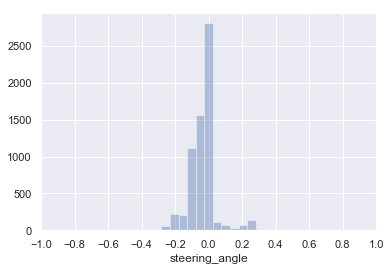

In [3]:
df_normal = DatasetHandler.read('./datasets/training-dataset-normal/driving_log.csv')
plot_steerings_distribution(df_normal, bins=bins, xticks=xticks)

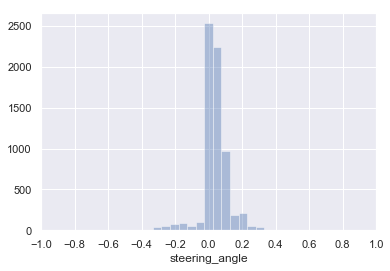

In [4]:
df_normal_reverse = DatasetHandler.read('./datasets/training-dataset-normal-reverse/driving_log.csv')
plot_steerings_distribution(df_normal_reverse, bins=bins, xticks=xticks)

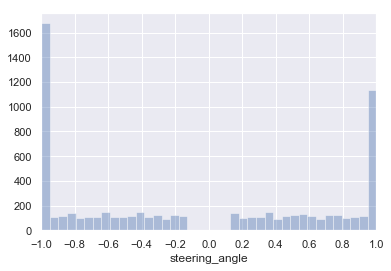

In [5]:
df_drunk_cleaned = DatasetHandler.read('./datasets/training-dataset-drunk-cleaned/driving_log.csv')
plot_steerings_distribution(df_drunk_cleaned, bins=bins, xticks=xticks)

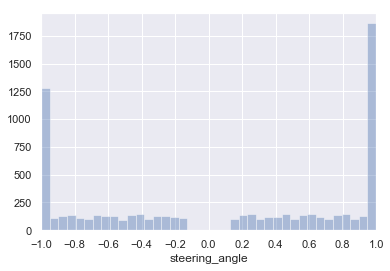

In [6]:
df_drunk_reverse_cleaned = DatasetHandler.read('./datasets/training-dataset-drunk-reverse-cleaned/driving_log.csv')
plot_steerings_distribution(df_drunk_reverse_cleaned, bins=bins, xticks=xticks)

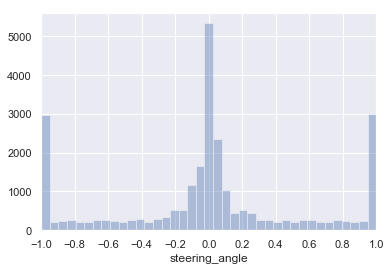

In [7]:
dataset = pd.concat([df_normal, df_normal_reverse, df_drunk_cleaned, df_drunk_reverse_cleaned])
plot_steerings_distribution(dataset, bins=bins, xticks=xticks)

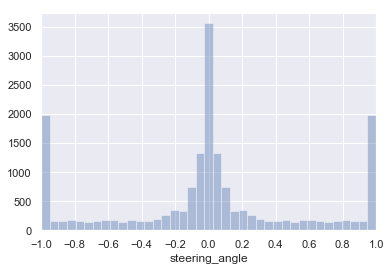

In [8]:
## WIP from now on
df_center_only = dataset[dataset['pov'] == 'center'].copy(deep=True)
df_center_only['flip'] = False
df_center_only_flipped = df_center_only.copy(deep=True)
df_center_only_flipped['flip'] = True
df_center_only_flipped['steering_angle'] = -df_center_only_flipped['steering_angle']
df_center_full = pd.concat([df_center_only, df_center_only_flipped])
plot_steerings_distribution(df_center_full, bins=bins, xticks=xticks)

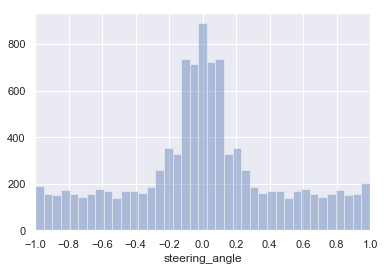

In [9]:
df_filtered = pd.concat([
    df_center_full[df_center_full.steering_angle.abs() < straight_threshold].sample(frac=0.25),
    df_center_full[(df_center_full.steering_angle.abs() >= straight_threshold) &
                   (df_center_full.steering_angle.abs() < sharp_turn_threshold)],
    df_center_full[df_center_full.steering_angle.abs() >= sharp_turn_threshold].sample(frac=0.10),
])
plot_steerings_distribution(df_filtered, bins=bins, xticks=xticks)

In [10]:
from self_driving_car.model import build_model, train_model

Using TensorFlow backend.


Epoch 1/30
100/100 [==============================] - 303s 3s/step - loss: 0.1712 - mean_absolute_error: 0.3042 - val_loss: 0.1360 - val_mean_absolute_error: 0.2717
Epoch 2/30
100/100 [==============================] - 301s 3s/step - loss: 0.1280 - mean_absolute_error: 0.2569 - val_loss: 0.1307 - val_mean_absolute_error: 0.2627
Epoch 3/30
100/100 [==============================] - 306s 3s/step - loss: 0.1166 - mean_absolute_error: 0.2436 - val_loss: 0.1170 - val_mean_absolute_error: 0.2426
Epoch 4/30
100/100 [==============================] - 235s 2s/step - loss: 0.1054 - mean_absolute_error: 0.2319 - val_loss: 0.1079 - val_mean_absolute_error: 0.2324
Epoch 5/30
100/100 [==============================] - 233s 2s/step - loss: 0.0907 - mean_absolute_error: 0.2159 - val_loss: 0.0813 - val_mean_absolute_error: 0.2077
Epoch 6/30
100/100 [==============================] - 235s 2s/step - loss: 0.0755 - mean_absolute_error: 0.1979 - val_loss: 0.0697 - val_mean_absolute_error: 0.1913
Epoch 7/30

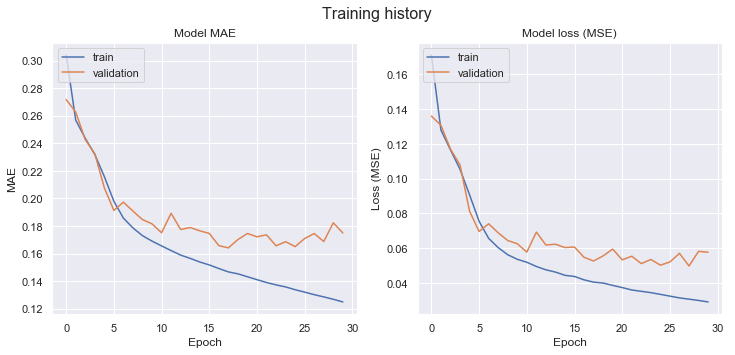

In [14]:
model_center = build_model((64, 64, 3), {'lr': 0.001, 'momentum': 0.9})
train_model(model_center, df_filtered, 512, 30, steps_per_epoch=100, augmenters=[],
            plot_history=True, save_history=True, model_name='++center')

Epoch 1/30
100/100 [==============================] - 483s 5s/step - loss: 0.1841 - mean_absolute_error: 0.3153 - val_loss: 0.1387 - val_mean_absolute_error: 0.2674
Epoch 2/30
100/100 [==============================] - 493s 5s/step - loss: 0.1432 - mean_absolute_error: 0.2740 - val_loss: 0.1138 - val_mean_absolute_error: 0.2484
Epoch 3/30
100/100 [==============================] - 509s 5s/step - loss: 0.1204 - mean_absolute_error: 0.2497 - val_loss: 0.0935 - val_mean_absolute_error: 0.2254
Epoch 4/30
100/100 [==============================] - 452s 5s/step - loss: 0.1063 - mean_absolute_error: 0.2347 - val_loss: 0.0845 - val_mean_absolute_error: 0.2099
Epoch 5/30
100/100 [==============================] - 495s 5s/step - loss: 0.0995 - mean_absolute_error: 0.2296 - val_loss: 0.0924 - val_mean_absolute_error: 0.2235
Epoch 6/30
100/100 [==============================] - 475s 5s/step - loss: 0.0964 - mean_absolute_error: 0.2268 - val_loss: 0.0924 - val_mean_absolute_error: 0.2224
Epoch 7/30

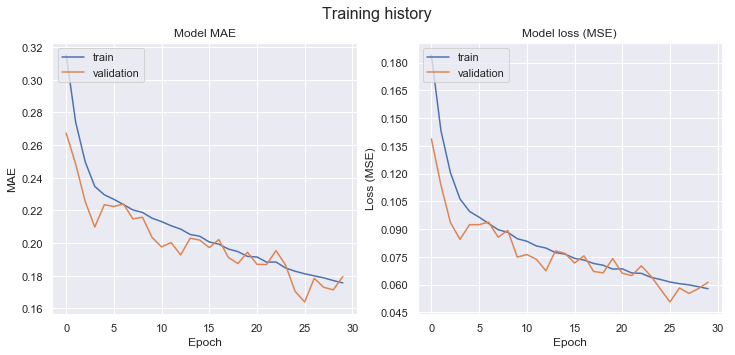

In [17]:
model_center_augs = build_model((64, 64, 3), {'lr': 0.001, 'momentum': 0.9})
train_model(model_center_augs, df_filtered, 512, 30, steps_per_epoch=100,
            plot_history=True, save_history=True, model_name='++center+augmenters')

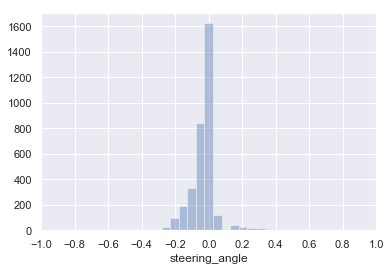

In [11]:
df_extra_normal = DatasetHandler.read('./datasets/extra-dataset-normal/driving_log.csv')
plot_steerings_distribution(df_extra_normal, bins=bins, xticks=xticks)

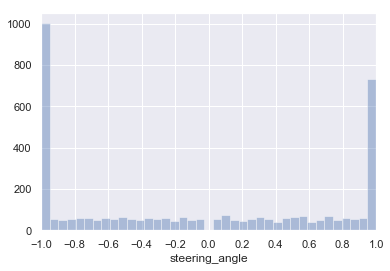

In [12]:
df_extra_drunk = DatasetHandler.read('./datasets/extra-dataset-drunk/driving_log.csv')
df_extra_drunk = df_extra_drunk[df_extra_drunk['steering_angle'].abs() >= straight_threshold]
plot_steerings_distribution(df_extra_drunk, bins=bins, xticks=xticks)

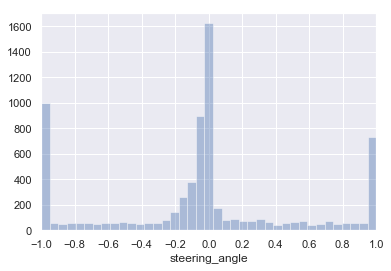

In [13]:
dataset_extra = pd.concat([df_extra_normal, df_extra_drunk])
plot_steerings_distribution(dataset_extra, bins=bins, xticks=xticks)

In [18]:
df_debug_center = debug_steering_correction(model_center, dataset_extra)

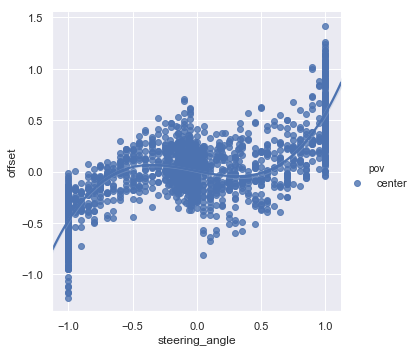

In [20]:
sns.lmplot(x='steering_angle', y='offset',
           data=df_debug_center[df_debug_center['pov'] == 'center'], hue='pov', order=3)

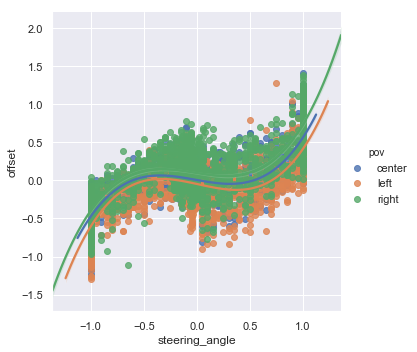

In [21]:
sns.lmplot(x='steering_angle', y='offset',
           data=df_debug_center, hue='pov', order=3)

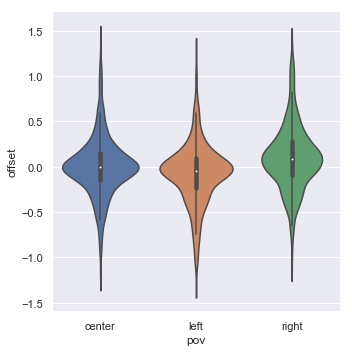

In [22]:
sns.catplot(x='pov', y='offset', kind='violin', data=df_debug_center)

In [19]:
df_debug_center_augs = debug_steering_correction(model_center_augs, dataset_extra)

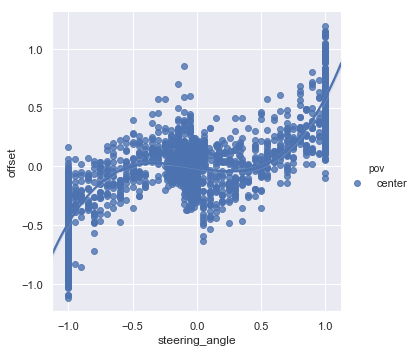

In [23]:
sns.lmplot(x='steering_angle', y='offset',
           data=df_debug_center_augs[df_debug_center_augs['pov'] == 'center'], hue='pov', order=3)

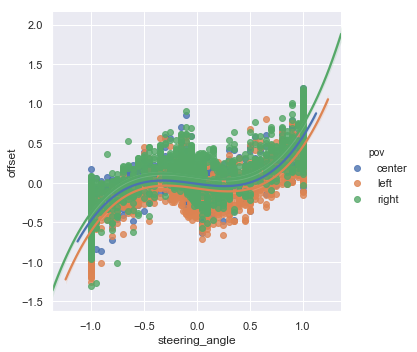

In [24]:
sns.lmplot(x='steering_angle', y='offset',
           data=df_debug_center_augs, hue='pov', order=3)

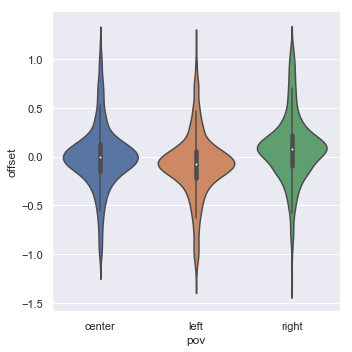

In [25]:
sns.catplot(x='pov', y='offset', kind='violin', data=df_debug_center_augs)